In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import rie_estimator
import csestimator

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
european_returns = pd.read_csv('/home/dum/Desktop/data/european_market_returns.csv', index_col = "Date")
american_returns = pd.read_csv('/home/dum/Desktop/data/sp_500_returns.csv', index_col = "Date")

In [3]:
norm_european_returns = (european_returns -european_returns.mean()) / european_returns.std()
norm_american_returns = (american_returns -american_returns.mean()) / american_returns.std()

In [5]:
samp_corr_european = european_returns.corr()

In [6]:
samp_corr_european_norm = norm_european_returns.corr()
samp_corr_american_norm = norm_american_returns.corr()

<AxesSubplot:ylabel='Density'>

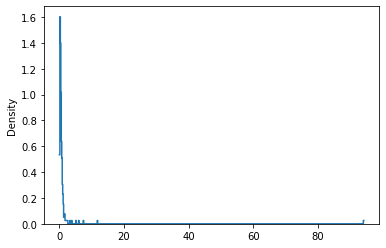

In [20]:
sns.histplot(data = eigenval_sample, stat = "density", element = "step", fill = False, label="GOE")

(array([0.20845013, 0.00234214, 0.00078071, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00078071]),
 array([6.31215304e-08, 4.70912471e+00, 9.41824936e+00, 1.41273740e+01,
        1.88364987e+01, 2.35456233e+01, 2.82547480e+01, 3.29638726e+01,
        3.76729973e+01, 4.23821219e+01, 4.70912466e+01, 5.18003712e+01,
        5.65094959e+01, 6.12186205e+01, 6.59277452e+01, 7.06368698e+01,
        7.53459945e+01, 8.00551191e+01, 8.47642438e+01, 8.94733684e+01,
        9.41824931e+01]),
 <BarContainer object of 20 artists>)

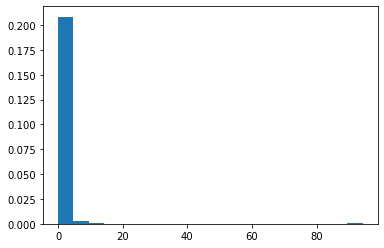

In [21]:
plt.hist(eigenval_sample, bins = 20, density=True)

In [8]:
rie_est_american = rie_estimator.get_rie(norm_american_returns)
rie_est_european = rie_estimator.get_rie(norm_european_returns)

In [18]:
shrink_estimator_european = csestimator.get_shrinkage_est(norm_european_returns, 0.5)
shrink_estimator_american = csestimator.get_shrinkage_est(norm_american_returns, 0.5)

Calcular la distancia entre rie y correlacion muestral:

In [12]:
np.linalg.norm(((samp_corr_american_norm - rie_est_american).values), ord = "fro")

1.7441872022896607

In [17]:
np.linalg.norm(((samp_corr_american_norm - shrink_estimator_american).values), ord = "fro")

85.14491908011952

In [42]:
eigenval_sample, eigenvec_sample = np.linalg.eig(samp_corr_american_norm.values)
eigenval_rie, eigenvec_rie = np.linalg.eig(rie_est_american)
eigenval_shrink, eigenvec_shrink = np.linalg.eig(shrink_estimator_european)

In [43]:
eigenval_sample.sort()
eigenval_rie.sort()
eigenval_shrink.sort()

In [100]:
eigenval_rie.max()

173.2088869510818

In [57]:
eigenval_sample.max()

94.18249308115176

In [99]:
eigenval_rie.min()

0.022978242867305848

In [59]:
eigenval_sample.min()

6.312153444346016e-08

In [66]:
eigenval_sample.shape

(272,)

In [97]:
eigenval_shrink.min()

0.1682400159741834

In [132]:
eigenval_shrink

array([  0.16824002,   0.17032146,   0.17125832,   0.17474076,
         0.17490339,   0.17653733,   0.17783571,   0.17910459,
         0.18017523,   0.18053658,   0.18205132,   0.18287349,
         0.18510836,   0.18625185,   0.1886017 ,   0.19168379,
         0.19321038,   0.1944692 ,   0.19569015,   0.19753227,
         0.19789412,   0.19926025,   0.20137858,   0.20189799,
         0.20394655,   0.2047652 ,   0.20543103,   0.20828573,
         0.20877703,   0.2106328 ,   0.21368444,   0.2157338 ,
         0.21605475,   0.21662666,   0.21901133,   0.22065982,
         0.22325238,   0.2260057 ,   0.22746551,   0.22915389,
         0.23095654,   0.23308548,   0.23439363,   0.23507693,
         0.23687858,   0.23747613,   0.24017645,   0.24175662,
         0.24248191,   0.24406749,   0.24740931,   0.24749517,
         0.24952943,   0.25042383,   0.25385243,   0.25425889,
         0.25597339,   0.25618165,   0.2606314 ,   0.26314006,
         0.26391139,   0.26498126,   0.2662334 ,   0.26

In [128]:
eigenval_sample.sort()

In [131]:
eigenval_sample

array([5.28977390e-03, 2.54419140e-02, 5.27819648e-02, 5.48293921e-02,
       5.76265561e-02, 5.96669509e-02, 6.09817513e-02, 6.27511572e-02,
       6.55187987e-02, 6.63485651e-02, 6.71231081e-02, 6.91224334e-02,
       6.95799338e-02, 7.07070685e-02, 7.22391669e-02, 7.32317227e-02,
       7.35438556e-02, 7.44152382e-02, 7.54690854e-02, 7.80225533e-02,
       7.90285919e-02, 8.01525882e-02, 8.13475234e-02, 8.17638536e-02,
       8.32830500e-02, 8.50001583e-02, 8.65151580e-02, 8.79746916e-02,
       8.85741465e-02, 8.88231547e-02, 8.94941967e-02, 9.07582306e-02,
       9.08846381e-02, 9.17152078e-02, 9.35908875e-02, 9.45419267e-02,
       9.51708965e-02, 9.59203233e-02, 9.75557088e-02, 9.87733652e-02,
       9.98557709e-02, 1.00209172e-01, 1.01523114e-01, 1.02044684e-01,
       1.03337711e-01, 1.03679689e-01, 1.04650550e-01, 1.05655911e-01,
       1.07636058e-01, 1.09006710e-01, 1.09993180e-01, 1.11419446e-01,
       1.12458091e-01, 1.12791341e-01, 1.13732036e-01, 1.14489245e-01,
      

hacer con puntos / logaritmos

In [138]:
eigenval_sample.shape

(460,)

[Text(0.5, 0, '$\\lambda$')]

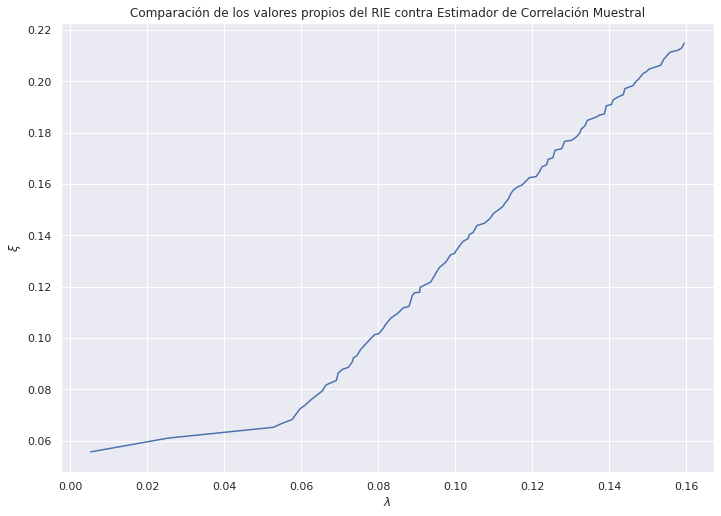

In [45]:
#ax = sns.lineplot(x = eigenval_sample[:170], y = eigenval_shrink[:170])
ax = sns.lineplot(x = eigenval_sample[:100], y = eigenval_rie[:100])
#plt.legend(labels=['Mercado Europeo', 'Mercado Americano'])    
plt.title("Comparación de los valores propios del RIE contra Estimador de Correlación Muestral")
ax.set(ylabel=r'$\xi$')
ax.set(xlabel=r'$\lambda$')
